# Universidad Autonoma de Aguascalientes
## Departamento: Ciencias de la computación
## Carrera: Ingenieria en computacion inteligente
### Curso: Inteligencia Artificial (Busqueda Tabu)
### Maestro: Dr. Francisco Javier Luna Rosas
### Alumno: Paola Montserrat Osorio Garcia 
### Semestre: Agosto_Diciembre  

## PRACTICA No. 11. La búsqueda local es una técnica utilizada para resolver problemas de optimización donde la solución óptima se busca moviéndose iterativamente entre soluciones vecinas en el espacio de búsqueda.

###  La búsqueda tabú es una técnica utilizada en la optimización para evitar que el algoritmo explore repetidamente las mismas soluciones, ayudando a escapar de los mínimos locales al mantener una lista de soluciones "prohibidas" o tabú. En esta practica implementaremos el algoritmo de Busqueda Tabu para buscar el optimo global de una función en 2D: f x = x^2 y lla graficamos.

# Paso 1: Importar librerias necesarias

In [28]:
import numpy as np
import matplotlib.pyplot as plt 
import random

# Paso 2. Definimos la funcion objetivo

In [29]:
def funcion_objetivo(x):
    return x ** 2

# Paso 3. Funcion para generar el vecindario (pequeñas variaciones de la solucion actual)

In [30]:
def generar_vecindario (solucion_actual, rango=5):
    return [solucion_actual + random. uniform(-rango, rango) for _ in range(10) ]

# Paso 4. Función para la busqueda tabu

In [31]:
# Búsqueda tabú

def busqueda_tabu(sol_inicial, iteraciones, tamaño_tabu): 
    solucion_actual = sol_inicial
    mejor_solucion = solucion_actual
    historial = [solucion_actual] # Almacenar el progreso de las soluciones
    lista_tabu = []
    for i in range(iteraciones):
        vecindario = generar_vecindario (solucion_actual)
        # Filtrar vecindario para no incluir soluciones tabú
        vecindario = [s for s in vecindario if s not in lista_tabu]
        # Evaluar Las soluciones del vecindario y elegir La mejor
        mejor_vecino = min(vecindario, key=funcion_objetivo)
        # Si encontramos una mejor solución, la actualizamos 
        if funcion_objetivo(mejor_vecino) < funcion_objetivo(mejor_solucion):
            mejor_solucion = mejor_vecino
        # Actualizamos La solución actual
        solucion_actual = mejor_vecino
        historial.append (solucion_actual)
        # Actualizar La Lista tabú 
        lista_tabu.append (solucion_actual)
        if len(lista_tabu) > tamaño_tabu:
            lista_tabu. pop (0) # Mantener el tamaño de La Lista tabú
    return mejor_solucion, historial

# Paso 5. Parametros del algoritmo

In [32]:
# Parámetros
sol_inicial = random.uniform(-100, 100)
iteraciones = 50
tamaño_tabu = 5

# Paso 6. Ejecutamos la busqueda tabu

In [33]:
mejor_solucion, historial = busqueda_tabu(sol_inicial, iteraciones, tamaño_tabu)
# Resultados
print(f"Mejor solución encontrada: {mejor_solucion}")
print(f"Valor de la función objetivo: {funcion_objetivo(mejor_solucion)}")

Mejor solución encontrada: 0.011239409839643777
Valor de la función objetivo: 0.00012632433354348136


# Paso 7. Graficamos la busqueda tabu

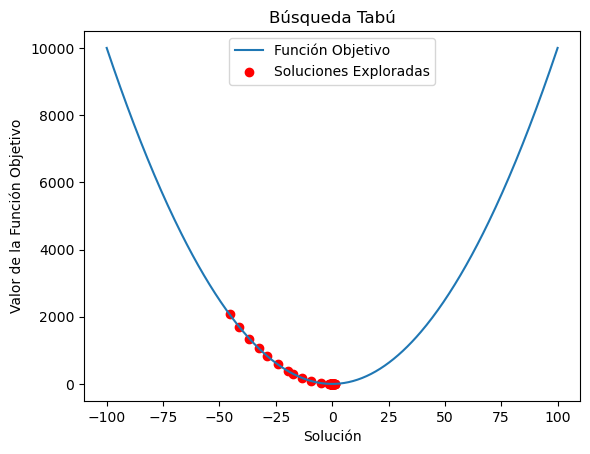

In [34]:
# Graficar Los resultados
x = np.linspace(-100, 100, 400)
y = funcion_objetivo(x)
plt. plot(x, y, label='Función Objetivo')
plt. scatter (historial, [funcion_objetivo(s) for s in historial], color='red',
label='Soluciones Exploradas')
plt. xlabel( 'Solución')
plt.ylabel( 'Valor de la Función Objetivo')
plt. title( 'Búsqueda Tabú')
plt.legend()
plt.show()

# Conclusiones

## En esta practica implementamos el algoritmo de Busqueda Tabu para buscar el optimo global de una función en 2D: f(x) = x^2 y la graficamos.

# Referencias.

## Talbi, El-Ghazali (200). "Metaheuristics : from design to implementation" John Wiley & Sons, Inc. 2009. ISBN 978-0-470-27858-1